C:\Users\User\AppData\Local\Temp\ipykernel_23016\523441726.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Road Network', loc='upper right', frameon=True)


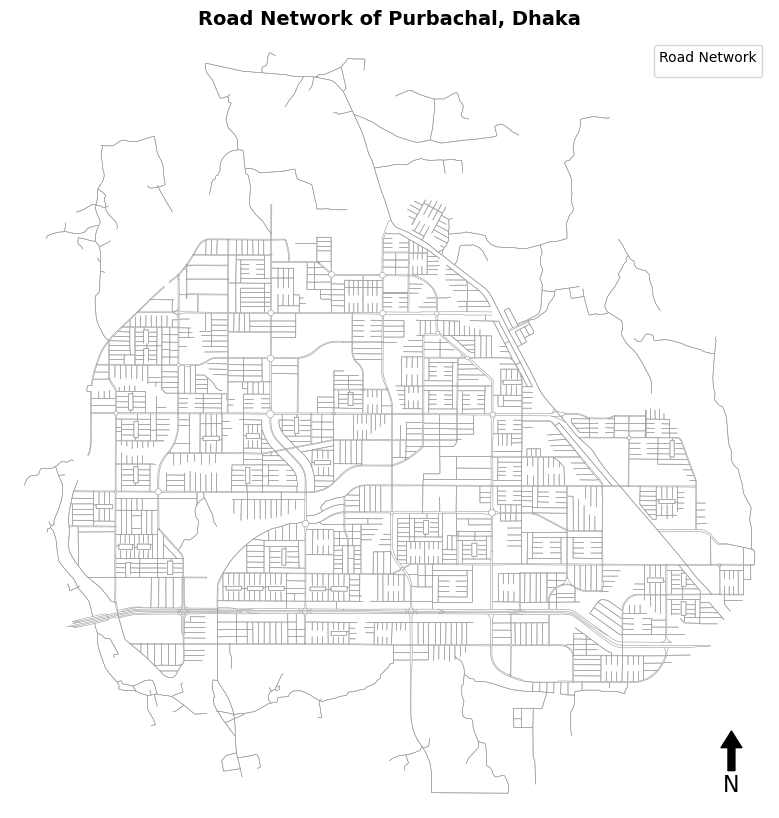

In [11]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Coordinates of central Purbachal (adjust if needed)
lat, lon = 23.8552, 90.5051
center_point = Point(lon, lat)

# Project center point to UTM (meters) for accurate buffering
projected_point, crs = ox.projection.project_geometry(center_point)
buffer_distance = 4000  # meters
circular_buffer = projected_point.buffer(buffer_distance)

# Wrap in GeoDataFrame and set CRS
buffer_gdf = gpd.GeoDataFrame(geometry=[circular_buffer], crs=crs)

# Reproject back to WGS84 (EPSG:4326)
buffer_geom = buffer_gdf.to_crs("EPSG:4326").geometry.iloc[0]

# Step 1: Get walkable network within buffer
G = ox.graph_from_polygon(buffer_geom, network_type='drive')


# Step 5: Plotting

fig, ax = plt.subplots(figsize=(10, 10))

    
# Plot network graph
ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.4, show=False, close=False)

# Add North arrow
x, y, arrow_length = 0.95, 0.1, 0.07  # position and length relative to axes coordinates
ax.annotate('N',
            xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center',
            fontsize=16,
            xycoords=ax.transAxes)

ax.legend(title='Road Network', loc='upper right', frameon=True)

# Final touches
ax.set_title("Road Network of Purbachal, Dhaka", 
             fontsize=14, 
             fontweight='bold', 
             pad=10)  # Increase pad to move title down

plt.savefig("Purbachal.jpg", dpi=300, format="jpeg", bbox_inches="tight")
plt.show()
